**Importing libraries**

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from IPython.core.pylabtools import figsize
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Importing Dataset**

In [ ]:
Worksheet1 = pd.read_csv('https://query.data.world/s/xlh353wvypzveoxm7h4u4c6hnucftk',encoding='latin-1')

**Checking the dimension of data**


In [ ]:
Worksheet1.shape

(3047, 34)

In [ ]:
Worksheet1.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,36.9,41.7,"Kitsap County, Washington",2.54,52.5,11.5,39.5,42.1,6.9,23.2,19.6,51.9,8.0,75.1,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,32.2,33.7,"Kittitas County, Washington",2.34,44.5,6.1,22.4,64.0,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,44.0,45.8,"Klickitat County, Washington",2.62,54.2,24.0,36.6,NaN,9.5,29.0,16.0,45.9,7.0,63.7,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,42.2,43.4,"Lewis County, Washington",2.52,52.7,20.2,41.2,36.1,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,47.8,48.9,"Lincoln County, Washington",2.34,57.8,14.9,43.0,40.0,2.0,33.4,15.0,48.2,4.8,61.6,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [ ]:
Worksheet1.tail()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,"(45201, 48021.6]",44.2,41.1,48.8,"Ellsworth County, Kansas",2.08,51.0,20.9,27.9,NaN,8.4,32.2,15.2,51.7,4.3,78.3,54.9,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,"(48021.6, 51046.4]",30.4,29.3,31.4,"Finney County, Kansas",2.90,52.6,26.7,33.9,35.6,3.8,23.1,12.4,70.1,4.6,64.5,53.3,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,"(51046.4, 54545.6]",30.9,30.5,31.2,"Ford County, Kansas",3.04,54.8,19.7,44.5,33.3,2.5,23.0,12.8,64.8,6.4,62.0,52.6,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,"(48021.6, 51046.4]",39.0,36.9,40.5,"Franklin County, Kansas",2.56,58.8,10.9,37.2,NaN,4.1,36.1,14.4,NaN,6.9,75.9,56.3,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938
3046,1962.667684,48,213.6,453.549422,41193,37030,13.9,0.000000,"(40362.7, 42724.4]",26.2,25.5,27.0,"Geary County, Kansas",2.83,59.5,8.0,43.3,43.9,4.8,29.8,13.7,48.8,9.2,76.1,60.3,22.9,25.1,12.6,70.098132,16.590100,3.177753,1.356457,56.040242,8.981723


In [ ]:
Worksheet1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [ ]:
Worksheet1.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

In [ ]:
def missing(df1):
        # Total missing values
        val = df1.isnull().sum()
        
        # Percentage of missing values
        percent = 100 * df1.isnull().sum() / len(Worksheet1)
        
        # Make a table with the results
        table = pd.concat([val, percent], axis=1)
        
        # Rename the columns
        table_ren_columns = table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        table_ren_columns = table_ren_columns[table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
        # Return the dataframe with missing information
        return table_ren_columns

In [ ]:
missing(Worksheet1)

,Missing Values,% of Total Values
PctSomeCol18_24,2285,75.0
PctPrivateCoverageAlone,609,20.0
PctEmployed16_Over,152,5.0


In [ ]:
missing_df = missing(Worksheet1)
#removing columns having missing data more than 10%
missing_columns = list(missing_df[missing_df['% of Total Values'] > 10].index)
df_new = Worksheet1.drop(columns = list(missing_columns))

In [ ]:
df_new['PctEmployed16_Over']=df_new['PctEmployed16_Over'].fillna(df_new['PctEmployed16_Over'].mean())


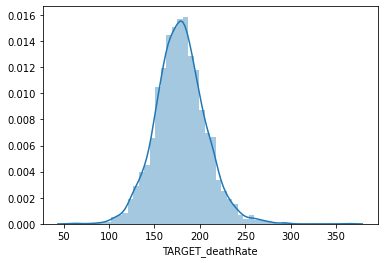

In [ ]:
sns.distplot(df_new['TARGET_deathRate'])

In [ ]:
df_new.shape
print(df_new.columns)

Index(['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'binnedInc',
       'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'Geography',
       'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24',
       'PctBachDeg18_24', 'PctHS25_Over', 'PctBachDeg25_Over',
       'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage',
       'PctEmpPrivCoverage', 'PctPublicCoverage', 'PctPublicCoverageAlone',
       'PctWhite', 'PctBlack', 'PctAsian', 'PctOtherRace',
       'PctMarriedHouseholds', 'BirthRate'],
      dtype='object')


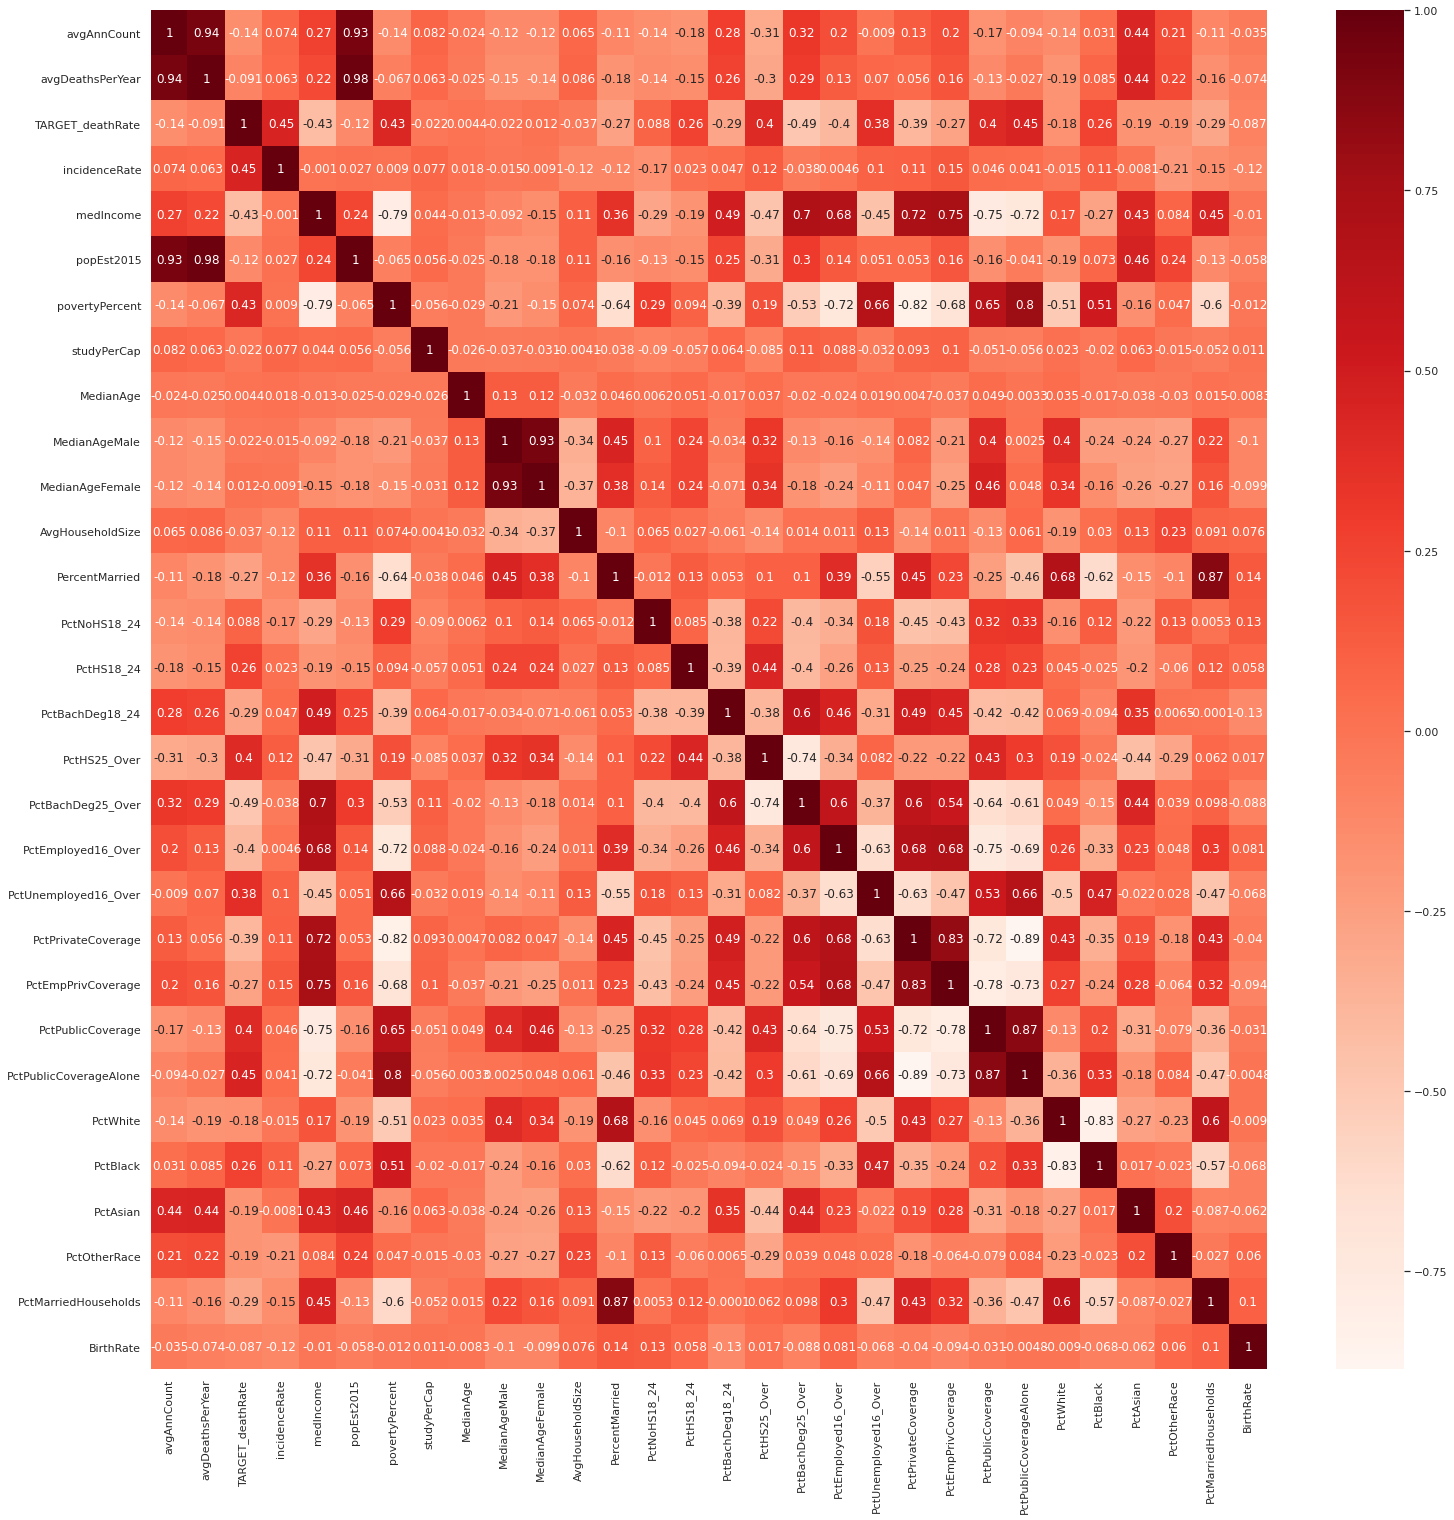

In [ ]:
sns.set(rc={'figure.figsize':(25,25)})
sns.heatmap(df_new.corr(), annot=True, cmap='Reds')

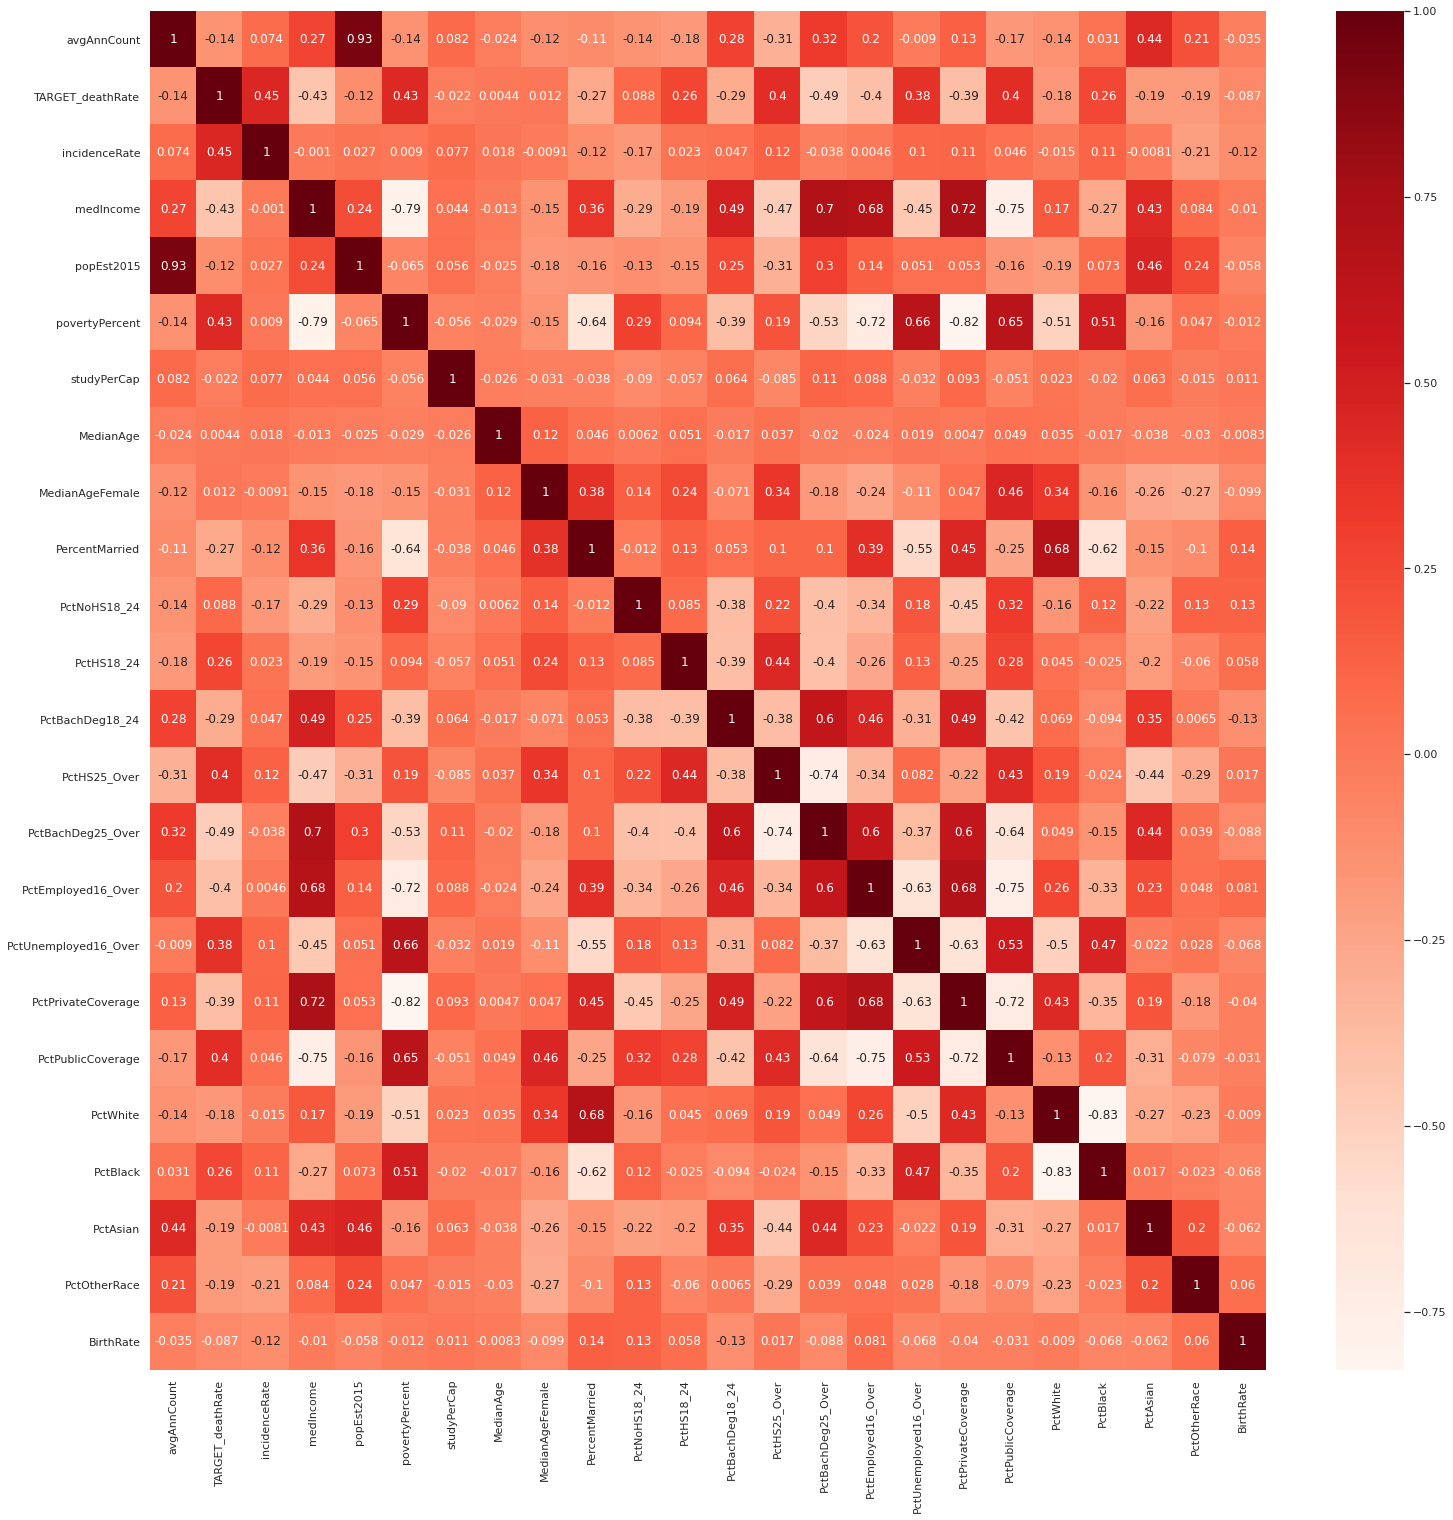

In [ ]:
new_feature = ['avgAnnCount', 'TARGET_deathRate', 'incidenceRate', 'medIncome',
       'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge',
        'MedianAgeFemale',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over',
       'PctUnemployed16_Over', 'PctPrivateCoverage',
       'PctPublicCoverage',  'PctWhite', 'PctBlack',
       'PctAsian', 'PctOtherRace', 'BirthRate']

sns.heatmap(df_new[new_feature].corr(), annot=True, cmap='Reds')

In [ ]:
df_new = df_new.astype({'popEst2015' :'float64' , 'medIncome' : 'float64' , 'avgDeathsPerYear' : 'float64'  })
df_new.dtypes


avgAnnCount               float64
avgDeathsPerYear          float64
TARGET_deathRate          float64
incidenceRate             float64
medIncome                 float64
popEst2015                float64
povertyPercent            float64
studyPerCap               float64
binnedInc                  object
MedianAge                 float64
MedianAgeMale             float64
MedianAgeFemale           float64
Geography                  object
AvgHouseholdSize          float64
PercentMarried            float64
PctNoHS18_24              float64
PctHS18_24                float64
PctBachDeg18_24           float64
PctHS25_Over              float64
PctBachDeg25_Over         float64
PctEmployed16_Over        float64
PctUnemployed16_Over      float64
PctPrivateCoverage        float64
PctEmpPrivCoverage        float64
PctPublicCoverage         float64
PctPublicCoverageAlone    float64
PctWhite                  float64
PctBlack                  float64
PctAsian                  float64
PctOtherRace  

In [ ]:
df_new =pd.get_dummies(df_new)

In [ ]:
df_new.dtypes

avgAnnCount                                    float64
avgDeathsPerYear                               float64
TARGET_deathRate                               float64
incidenceRate                                  float64
medIncome                                      float64
                                                ...   
Geography_Yukon-Koyukuk Census Area, Alaska      uint8
Geography_Yuma County, Arizona                   uint8
Geography_Yuma County, Colorado                  uint8
Geography_Zapata County, Texas                   uint8
Geography_Zavala County, Texas                   uint8
Length: 3087, dtype: object

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
train_x , test_x = train_test_split(df_new , train_size = 0.7 ,test_size = 0.3 , random_state = 100)

In [ ]:
x = df_new.drop(['TARGET_deathRate' , 'PctMarriedHouseholds' , 'popEst2015' , 'BirthRate' , 'PctBachDeg25_Over' , 'PctPublicCoverage' ,'PctBachDeg18_24', 'PctPrivateCoverage' , 'MedianAgeMale' ,  'medIncome' ,  'PctUnemployed16_Over' , 'avgDeathsPerYear' ,  'AvgHouseholdSize','PctWhite'   ] , axis =1)
y = df_new['TARGET_deathRate']

In [ ]:
lm = LinearRegression()
lm.fit(x,y)
rfe = RFE(lm,10)
rfe =rfe.fit(x,y)

In [ ]:
list(zip(x.columns , rfe.support_ ,rfe.ranking_))

In [ ]:
col = x.columns[rfe.support_]
col

In [ ]:
x.columns[~rfe.support_]

In [ ]:
x_rfe = x[col]

In [ ]:
import statsmodels.api as sm
#x_rfe = sm.add_constant(x_rfe)
lm = sm.OLS(y ,x_rfe).fit()
print(lm.summary())

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
z = x_rfe
vif['features'] = z.columns
vif['vif'] = [variance_inflation_factor(z.values , i) for i in range(z.shape[1])]
vif['vif'] = round(vif['vif'] , 2)
vif = vif.sort_values(by ='vif' , ascending = False)
vif

In [ ]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
y_price = lm.predict(x_rfe)

In [ ]:
fig = plt.figure()
sns.distplot((y - y_price ),bins = 20)
fig.suptitle('Error Terms' , fontsize=20)
plt.xlabel('errors' , fontsize = 18)

In [ ]:
x_test = test_x.pop('TARGET_deathRate')
y_test = test_x

In [ ]:
y_pred = lm.predict(x_test_new)


In [ ]:
plt.figure(figsize = (10,6) , facecolor = 'r' , edgecolor = 'w')
plt.scatter(x_test  , y_pred)